## Support Vector Machine with Polynomial Kernel

In [112]:
# Import the necessary libraries
import pandas as pd
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import multilabel_confusion_matrix, precision_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform

In [113]:
# Disables Python warnings
warnings.filterwarnings('ignore')

In [114]:
# Loads the cleaned CSV dataset
df = pd.read_csv('cleaned_dataset.csv')
df

,orderid,Customer Name,shipmode,sales,quantity,discount,profit,segment,region,state,subcategory,category,preparationtime,orderdate,shipdate
0,2,Ruben Dartt,Standard Class,411.332,4,0.15,-4.8392,Consumer,West,California,Bookcases ...,Furniture,4,2014-09-05,2014-09-09
1,4,Liz Pelletier,First Class,241.960,2,0.00,33.8744,Consumer,South,Louisiana,Bookcases ...,Furniture,1,2016-05-30,2016-05-31
2,5,Liz Pelletier,Standard Class,341.960,2,0.00,78.6508,Home Office,East,Rhode Island,Bookcases ...,Furniture,7,2013-12-31,2014-01-07
3,6,Liz Pelletier,First Class,359.058,3,0.30,-35.9058,Home Office,Central,Illinois,Bookcases ...,Furniture,3,2014-03-24,2014-03-27
4,9,Sample Company A,Standard Class,290.666,2,0.15,27.3568,Corporate,West,California,Bookcases ...,Furniture,4,2013-05-26,2013-05-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7690,9988,Theresa Swint,Standard Class,470.376,3,0.20,52.9173,Consumer,West,California,Phones ...,Technology,4,2016-07-14,2016-07-18
7691,9990,Max Jones,First Class,1097.544,7,0.20,123.4737,Corporate,Central,Texas,Phones ...,Technology,2,2015-12-09,2015-12-11
7692,9992,Kristina Nunn,Standard Class,235.188,2,0.40,-43.1178,Corporate,East,Ohio,Phones ...,Technology,5,2014-01-12,2014-01-17
7693,9993,Sean Miller,First Class,391.980,2,0.00,113.6742,Consumer,East,Delaware,Phones ...,Technology,2,2016-09-22,2016-09-24


In [115]:
# Selects the features that will be used in the model
X = df[['shipmode', 'segment', 'quantity', 'sales', 'profit', 'discount', 'preparationtime']]

# Converts Categorical data into indicator values (Boolean in this case)
X = pd.get_dummies(X, columns=['shipmode', 'segment'])

In [116]:
# Encodes the values in the column 'category' as numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])
df['category'].values

array([0, 0, 0, ..., 2, 2, 2])

In [117]:
# Selects the encoded values in 'category' as the target variables that ill be used in the model
y = df['category']

In [118]:
# Splits the features and variables into training and testing data
# 25% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [119]:
# Standerises the feature data in the dataset
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

In [120]:
# Builds the pipeline to chain together a StandardScaler and a Support Vector Classifier
# The dataset is then trained
poly_kernel_svm_model = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, coef0=1, C=5))
poly_kernel_svm_model.fit(X_train_scaled, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [121]:
# Makes predictions using the training and test data and prints accuracy score
y_test_pred_SVC = poly_kernel_svm_model.predict(X_test_scaled)
y_train_pred_SVC = poly_kernel_svm_model.predict(X_train_scaled)

In [122]:
# Calculates the training score, test score, and accuracy score rounding them to 3 significant figures
train_score = poly_kernel_svm_model.score(X_train_scaled,y_train)
test_score = poly_kernel_svm_model.score(X_test_scaled,y_test)
accuracy = accuracy_score(y_test, y_test_pred_SVC)

print('Support Vector Classifier Evaluation:\n')
print('Training Score is: {:.3f}'.format(train_score))
print('Training Score is: {:.3f}'.format(test_score))
print('Accuracy Score: {:.3f}'.format(accuracy))

Support Vector Classifier Evaluation:

Training Score is: 0.716
Training Score is: 0.718
Accuracy Score: 0.718


Multilabel Confusion Matrix

In [123]:
# Creates a Confusion and a Multilabel Confusion Matrix comparing the test predictions to the original
mcm = multilabel_confusion_matrix(y_test, y_test_pred_SVC)

tn = mcm[:, 0, 0] # True Negative
tp = mcm[:, 1, 1] # True Positive
fn = mcm[:, 1, 0] # False Negative
fp = mcm[:, 0, 1] # False Positive

In [124]:
# Prints out the Confusion and Multilabel Confusion Matrix
print("Multilabel Confusion Matrix:\n", mcm)

Multilabel Confusion Matrix:
 [[[1478   55]
  [ 263  128]]

 [[ 308  412]
  [  39 1165]]

 [[1520   75]
  [ 240   89]]]


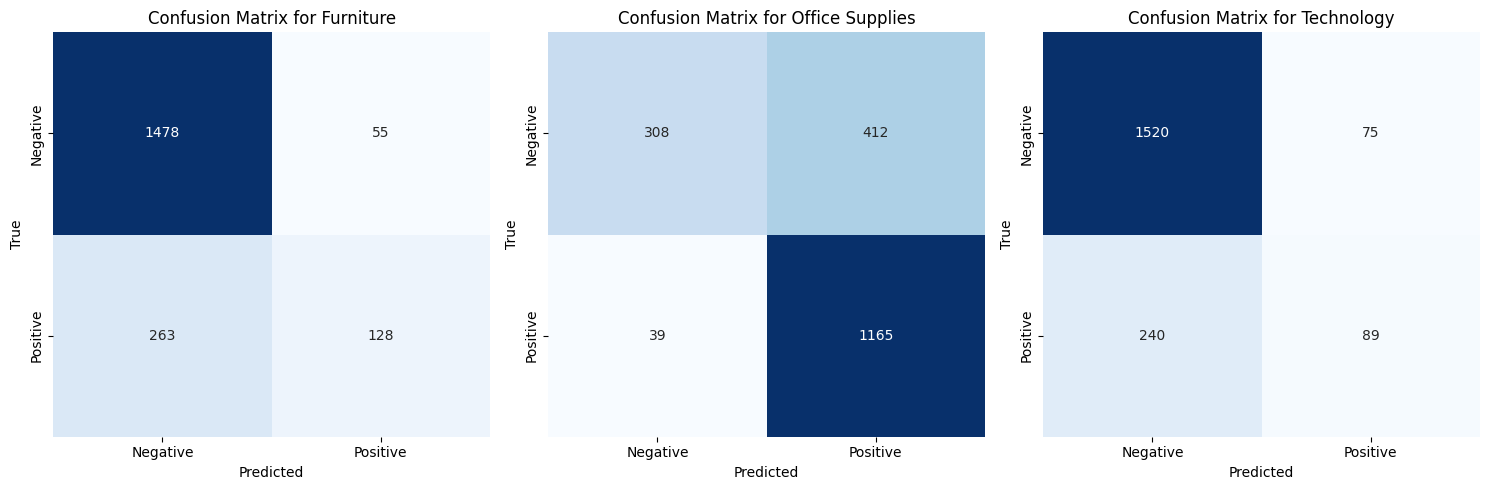

In [125]:
# Plots the multilabel confusion matrix
num_classes = len(le.classes_)
fig, axes = plt.subplots(nrows=1, ncols=num_classes, figsize=(15, 5))

for i, (ax, label) in enumerate(zip(axes.flatten(), le.classes_)):
    cm = mcm[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix for {label}')

plt.tight_layout()
plt.show()

In [126]:
# Calculates the true positive rate, true negative rate, F1 score, and precision
tp_rate = tp / (tp + fn)
tn_rate = tn / (tn + fp)
f1 = f1_score(y_test, y_test_pred_SVC, average=None)
precision = precision_score(y_test, y_test_pred_SVC, average='macro')

print("True Positive Rate is: ", tp_rate)
print("True Negative Rate is: ", tn_rate)
print("F1 Score is:           ", f1)
print("Precision Score is:    ", precision)

True Positive Rate is:  [0.32736573 0.96760797 0.27051672]
True Negative Rate is:  [0.96412264 0.42777778 0.95297806]
F1 Score is:            [0.44599303 0.83782812 0.36105477]
Precision Score is:     0.6602936434106693


In [127]:
# Creates a Confusion and a Multilabel Confusion Matrix comparing the training predictions to the original
mcm = multilabel_confusion_matrix(y_train, y_train_pred_SVC)

tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]

In [128]:
# Prints out the Confusion and Multilabel Confusion Matrix
print("Multilabel Confusion Matrix:\n", mcm)

Multilabel Confusion Matrix:
 [[[4440  144]
  [ 780  407]]

 [[ 868 1329]
  [ 118 3456]]

 [[4594  167]
  [ 742  268]]]


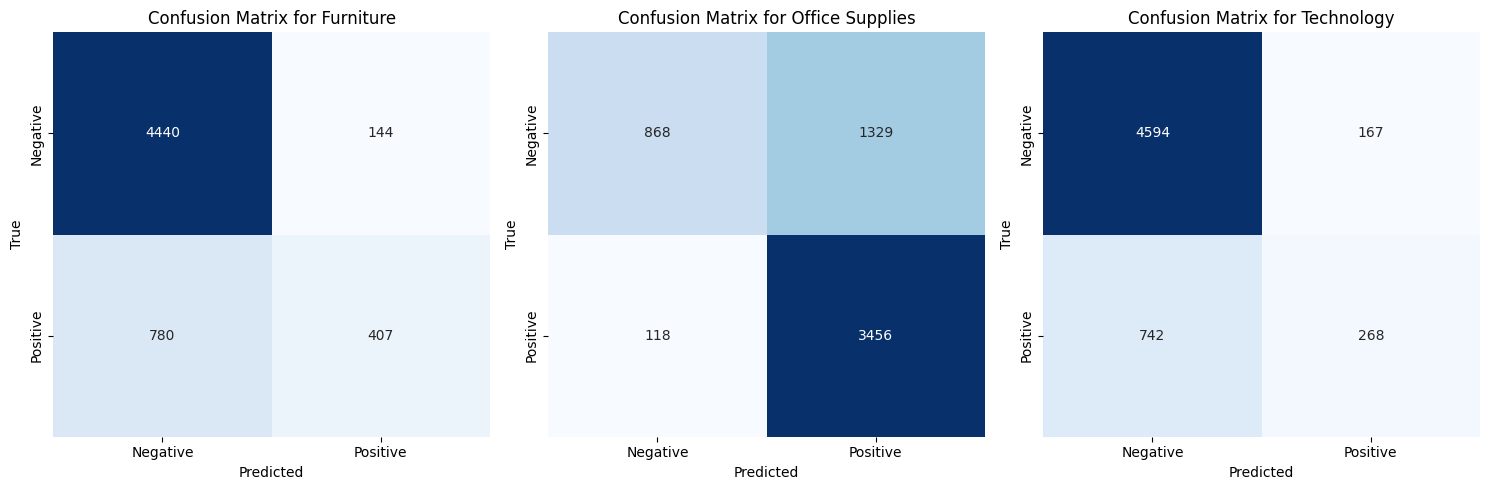

In [129]:
# Plots the multilabel confusion matrix
num_classes = len(le.classes_)
fig, axes = plt.subplots(nrows=1, ncols=num_classes, figsize=(15, 5))

for i, (ax, label) in enumerate(zip(axes.flatten(), le.classes_)):
    cm = mcm[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix for {label}')

plt.tight_layout()
plt.show()

In [130]:
# Calculates the true positive rate, true negative rate, F1 score, and precision
tp_rate = tp / (tp + fn)
tn_rate = tn / (tn + fp)
f1 = f1_score(y_train, y_train_pred_SVC, average=None)
precision = precision_score(y_train, y_train_pred_SVC, average='macro')

print("True Positive Rate is: ", tp_rate)
print("True Negative Rate is: ", tn_rate)
print("F1 Score is:           ", f1)
print("Precision Score is:    ", precision)

True Positive Rate is:  [0.34288121 0.96698377 0.26534653]
True Negative Rate is:  [0.96858639 0.39508421 0.96492334]
F1 Score is:            [0.46835443 0.82689317 0.37093426]
Precision Score is:     0.6923353315367834


Model Tuning (Grid Search)

In [131]:
# Sets up the GridSearchCV, defines the parameter grid, and trains it
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01],
    'kernel': ['linear', 'rbf', 'poly'],
}

grid_search_SVC = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy',  n_jobs=-1, verbose=1)
grid_search_SVC.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [132]:
# Prints out the best hyperparameters, it makes predictions using the model and evaluates it
best_params = grid_search_SVC.best_params_
best_model = grid_search_SVC.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_best) 

print(f"Best Hyperparameters: {best_params}")
print('Accuracy Score: {:.3f}'.format(accuracy))

Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy Score: 0.721


Model Tuning (Randomized Search)

In [133]:
# Sets up the RandomizedSearchCV, defines the parameter distribution, and trains it
param_dist = {
    'C': uniform(0.1, 10),
    'gamma': uniform(0.01, 0.1),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}

randomized_search_SVC = RandomizedSearchCV(SVC(), param_dist, cv=5, n_iter=30, scoring='accuracy',  n_jobs=-1, verbose=1, random_state=0)
randomized_search_SVC.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002195F673C10>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002195F5BC450>,
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=0, scoring='accuracy', verbose=1)

In [134]:
# Prints out the best hyperparameters, it makes predictions using the model and evaluates it
best_params = randomized_search_SVC.best_params_
best_model = randomized_search_SVC.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_best) 

print(f"Best Hyperparameters: {best_params}")
print('Accuracy Score: {:.3f}'.format(accuracy))

Best Hyperparameters: {'C': np.float64(9.864594650133958), 'gamma': np.float64(0.05686512016477016), 'kernel': 'rbf'}
Accuracy Score: 0.723
